# Bucket Sort - Experimentation

In [64]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Load data from csv file
serial_data = pd.read_csv("../experiments/performance_data.csv", sep='\t')

In [66]:
# Filter data to separate dataframes for analysis

uniform_serial_data = serial_data[(serial_data.implementation == "serial") & (serial_data.distribution == "uniform") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
normal_serial_data = serial_data[(serial_data.implementation == "serial") & (serial_data.distribution == "normal") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
exponential_serial_data = serial_data[(serial_data.implementation == "serial") & (serial_data.distribution == "exponential") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
uniform_parallel_data = serial_data[(serial_data.implementation == "parallel") & (serial_data.distribution == "uniform") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
normal_parallel_data = serial_data[(serial_data.implementation == "parallel") & (serial_data.distribution == "normal") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
exponential_parallel_data = serial_data[(serial_data.implementation == "parallel") & (serial_data.distribution == "exponential") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])

## 1. Experiments using serial code

### 1.1. Serial code performance analysis for 50 million numbers with varying bucket counts

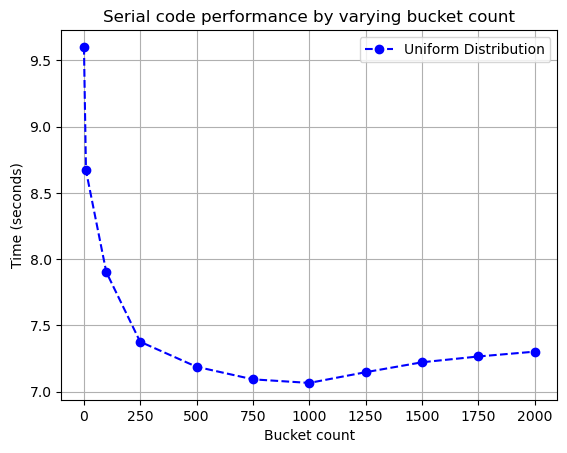

In [67]:
plt.plot(uniform_serial_data.bucket_count, uniform_serial_data.time, label='Uniform Distribution', marker='o', color='blue', linestyle='--')

plt.title('Serial code performance by varying bucket count')
plt.xlabel('Bucket count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

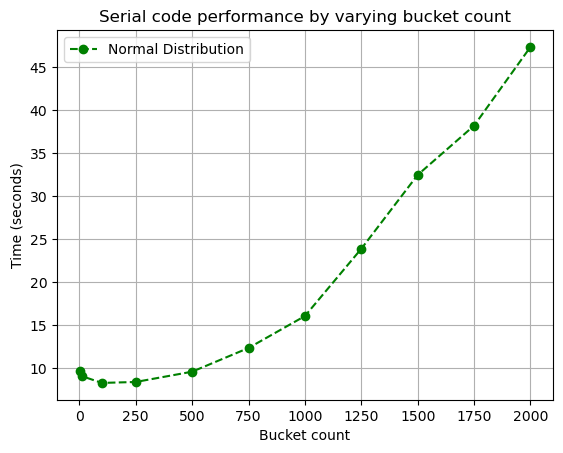

In [68]:
plt.plot(normal_serial_data.bucket_count, normal_serial_data.time, label='Normal Distribution', marker='o', color='green', linestyle='--')

plt.title('Serial code performance by varying bucket count')
plt.xlabel('Bucket count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

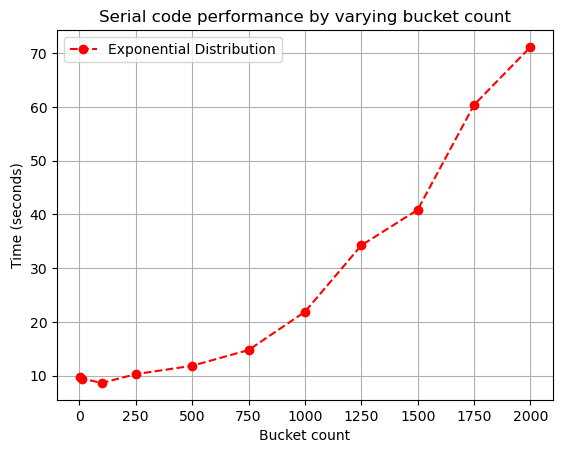

In [69]:
plt.plot(exponential_serial_data.bucket_count, exponential_serial_data.time, label='Exponential Distribution', marker='o', color='red', linestyle='--')

plt.title('Serial code performance by varying bucket count')
plt.xlabel('Bucket count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

### 1.2. Performance of serial program for different array sizes - keeping bucket size as constant = 100

In [70]:
serial_data_B100 = serial_data[(serial_data.implementation == "serial") & (serial_data.bucket_count == 100)]
serial_data_B100["ms_time"] = serial_data_B100["time"] * 1000
serial_data_B100["numbers_per_ms"] = serial_data_B100.array_size / serial_data_B100.ms_time

uniform_serial_data_B100 = serial_data_B100[serial_data_B100.distribution == "uniform"].sort_values(by=['array_size'])
normal_serial_data_B100 = serial_data_B100[serial_data_B100.distribution == "normal"].sort_values(by=['array_size'])
exponential_serial_data_B100 = serial_data_B100[serial_data_B100.distribution == "exponential"].sort_values(by=['array_size'])

/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_82681/3880396027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serial_data_B100["ms_time"] = serial_data_B100["time"] * 1000
/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_82681/3880396027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serial_data_B100["numbers_per_ms"] = serial_data_B100.array_size / serial_data_B100.ms_time


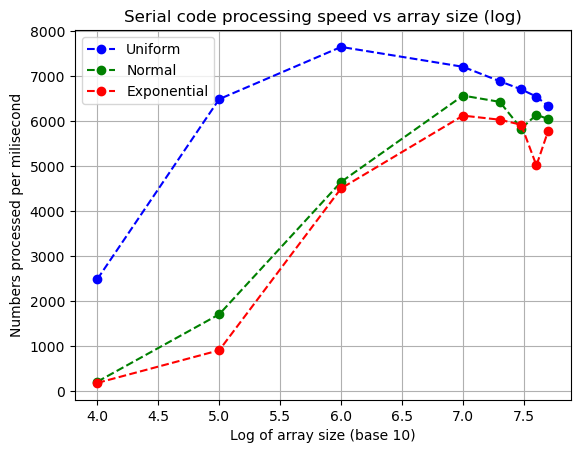

In [71]:
plt.plot(np.log10(uniform_serial_data_B100.array_size), uniform_serial_data_B100.numbers_per_ms, label='Uniform', marker='o', color='blue', linestyle='--')
plt.plot(np.log10(normal_serial_data_B100.array_size), normal_serial_data_B100.numbers_per_ms, label='Normal', marker='o', color='green', linestyle='--')
plt.plot(np.log10(exponential_serial_data_B100.array_size), exponential_serial_data_B100.numbers_per_ms, label='Exponential', marker='o', color='red', linestyle='--')

plt.title('Serial code processing speed vs array size (log)')
plt.xlabel('Log of array size (base 10)')
plt.ylabel('Numbers processed per milisecond')
plt.legend()
plt.grid(True)

plt.show()

## 2. Experiments using parallelized code

### 2.1. Parellel code performance analysis for 50 million numbers with varying bucket / thread counts

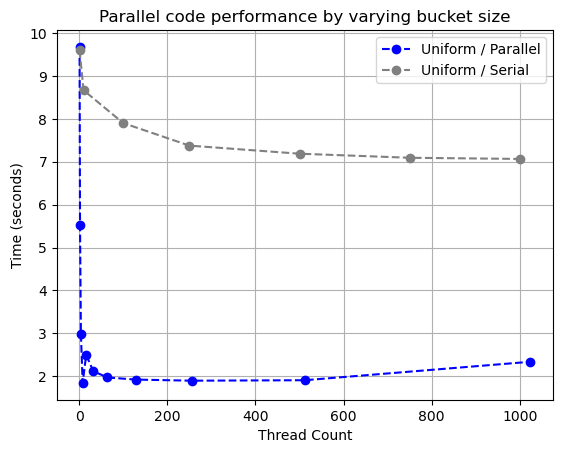

In [72]:
uniform_serial_data_filtered = uniform_serial_data[uniform_serial_data.bucket_count <= 1024]

plt.plot(uniform_parallel_data.bucket_count, uniform_parallel_data.time, label='Uniform / Parallel', marker='o', color='blue', linestyle='--')
plt.plot(uniform_serial_data_filtered.bucket_count, uniform_serial_data_filtered.time, label='Uniform / Serial', marker='o', color='gray', linestyle='--')

plt.title('Parallel code performance by varying bucket size')
plt.xlabel('Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

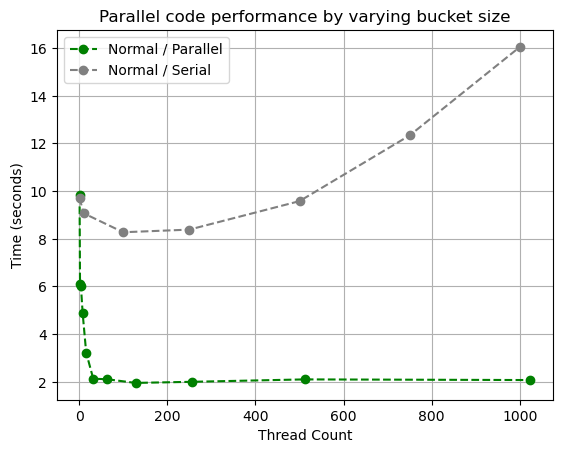

In [73]:
normal_serial_data_filtered = normal_serial_data[normal_serial_data.bucket_count <= 1024]

plt.plot(normal_parallel_data.bucket_count, normal_parallel_data.time, label='Normal / Parallel', marker='o', color='green', linestyle='--')
plt.plot(normal_serial_data_filtered.bucket_count, normal_serial_data_filtered.time, label='Normal / Serial', marker='o', color='gray', linestyle='--')

plt.title('Parallel code performance by varying bucket size')
plt.xlabel('Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

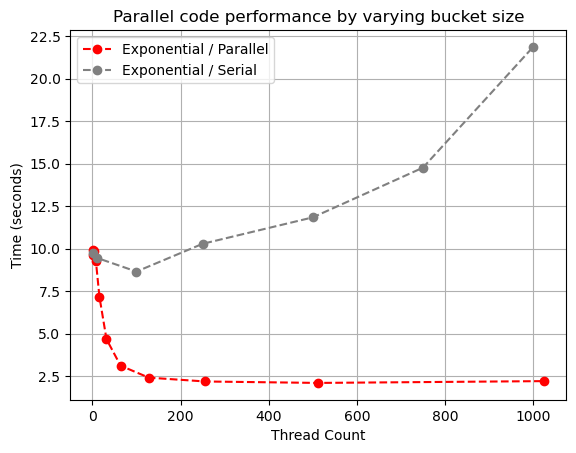

In [74]:
exponential_serial_data_filtered = exponential_serial_data[exponential_serial_data.bucket_count <= 1024]

plt.plot(exponential_parallel_data.bucket_count, exponential_parallel_data.time, label='Exponential / Parallel', marker='o', color='red', linestyle='--')
plt.plot(exponential_serial_data_filtered.bucket_count, exponential_serial_data_filtered.time, label='Exponential / Serial', marker='o', color='gray', linestyle='--')

plt.title('Parallel code performance by varying bucket size')
plt.xlabel('Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

### 2.2. Performance of parallel program for different array sizes - taking the best thread count for each distribution

In [75]:
parallel_data_B100 = serial_data[(serial_data.implementation == "parallel") & (serial_data.analysis == 2.2)]
parallel_data_B100["ms_time"] = parallel_data_B100["time"] * 1000
parallel_data_B100["numbers_per_ms"] = parallel_data_B100.array_size / parallel_data_B100.ms_time

uniform_parallel_data_B100 = parallel_data_B100[parallel_data_B100.distribution == "uniform"].sort_values(by=['array_size'])
normal_parallel_data_B100 = parallel_data_B100[parallel_data_B100.distribution == "normal"].sort_values(by=['array_size'])
exponential_parallel_data_B100 = parallel_data_B100[parallel_data_B100.distribution == "exponential"].sort_values(by=['array_size'])

/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_82681/3816865245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parallel_data_B100["ms_time"] = parallel_data_B100["time"] * 1000
/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_82681/3816865245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parallel_data_B100["numbers_per_ms"] = parallel_data_B100.array_size / parallel_data_B100.ms_time


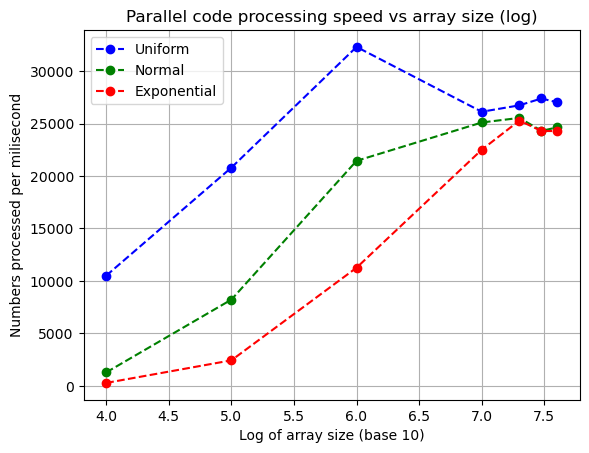

In [76]:
plt.plot(np.log10(uniform_parallel_data_B100.array_size), uniform_parallel_data_B100.numbers_per_ms, label='Uniform', marker='o', color='blue', linestyle='--')
plt.plot(np.log10(normal_parallel_data_B100.array_size), normal_parallel_data_B100.numbers_per_ms, label='Normal', marker='o', color='green', linestyle='--')
plt.plot(np.log10(exponential_parallel_data_B100.array_size), exponential_parallel_data_B100.numbers_per_ms, label='Exponential', marker='o', color='red', linestyle='--')

plt.title('Parallel code processing speed vs array size (log)')
plt.xlabel('Log of array size (base 10)')
plt.ylabel('Numbers processed per milisecond')
plt.legend()
plt.grid(True)

plt.show()

# 3. Experiments on Scheduling

In [77]:
# Load data from csv file
scheduling_data = pd.read_csv("../experiments/scheduling_data.csv", sep='\t')

uniform_static = scheduling_data[(scheduling_data.distribution == "uniform") & (scheduling_data.scheduling_type == "static")].sort_values(by=['bucket_count'])
uniform_dynamic = scheduling_data[(scheduling_data.distribution == "uniform") & (scheduling_data.scheduling_type == "dynamic")].sort_values(by=['bucket_count'])
normal_static = scheduling_data[(scheduling_data.distribution == "normal") & (scheduling_data.scheduling_type == "static")].sort_values(by=['bucket_count'])
normal_dynamic = scheduling_data[(scheduling_data.distribution == "normal") & (scheduling_data.scheduling_type == "dynamic")].sort_values(by=['bucket_count'])
exponential_static = scheduling_data[(scheduling_data.distribution == "exponential") & (scheduling_data.scheduling_type == "static")].sort_values(by=['bucket_count'])
exponential_dynamic = scheduling_data[(scheduling_data.distribution == "exponential") & (scheduling_data.scheduling_type == "dynamic")].sort_values(by=['bucket_count'])
uniform_none = scheduling_data[(scheduling_data.distribution == "uniform") & (scheduling_data.scheduling_type == "no")].sort_values(by=['bucket_count'])
normal_none = scheduling_data[(scheduling_data.distribution == "normal") & (scheduling_data.scheduling_type == "no")].sort_values(by=['bucket_count'])
exponential_none = scheduling_data[(scheduling_data.distribution == "exponential") & (scheduling_data.scheduling_type == "no")].sort_values(by=['bucket_count'])
uniform_dynamic_5 = scheduling_data[(scheduling_data.distribution == "uniform") & (scheduling_data.scheduling_type == "dynamic_chunk_5")].sort_values(by=['bucket_count'])
normal_dynamic_5 = scheduling_data[(scheduling_data.distribution == "normal") & (scheduling_data.scheduling_type == "dynamic_chunk_5")].sort_values(by=['bucket_count'])
exponential_dynamic_5 = scheduling_data[(scheduling_data.distribution == "exponential") & (scheduling_data.scheduling_type == "dynamic_chunk_5")].sort_values(by=['bucket_count'])
uniform_dynamic_25 = scheduling_data[(scheduling_data.distribution == "uniform") & (scheduling_data.scheduling_type == "dynamic_chunk_25")].sort_values(by=['bucket_count'])
normal_dynamic_25 = scheduling_data[(scheduling_data.distribution == "normal") & (scheduling_data.scheduling_type == "dynamic_chunk_25")].sort_values(by=['bucket_count'])
exponential_dynamic_25 = scheduling_data[(scheduling_data.distribution == "exponential") & (scheduling_data.scheduling_type == "dynamic_chunk_25")].sort_values(by=['bucket_count'])

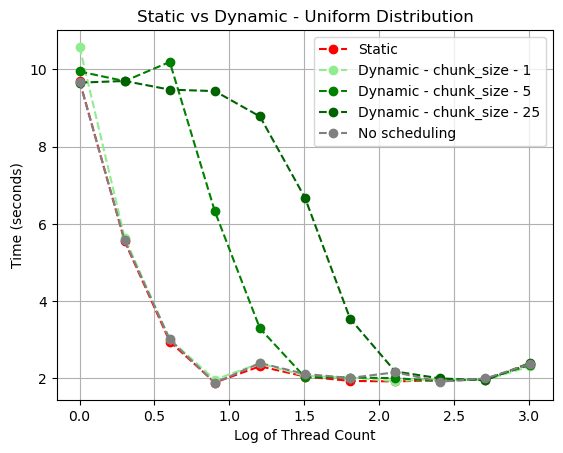

In [78]:
plt.plot(np.log10(uniform_static.bucket_count), uniform_static.time, label='Static', marker='o', color='red', linestyle='--')
plt.plot(np.log10(uniform_dynamic.bucket_count), uniform_dynamic.time, label='Dynamic - chunk_size - 1', marker='o', color=(0.56, 0.93, 0.56), linestyle='--')
plt.plot(np.log10(uniform_dynamic_5.bucket_count), uniform_dynamic_5.time, label='Dynamic - chunk_size - 5', marker='o', color='green', linestyle='--')
plt.plot(np.log10(uniform_dynamic_25.bucket_count), uniform_dynamic_25.time, label='Dynamic - chunk_size - 25', marker='o', color=(0.0, 0.39, 0.0), linestyle='--')
plt.plot(np.log10(uniform_none.bucket_count), uniform_none.time, label='No scheduling', marker='o', color='gray', linestyle='--')

plt.title('Static vs Dynamic - Uniform Distribution')
plt.xlabel('Log of Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

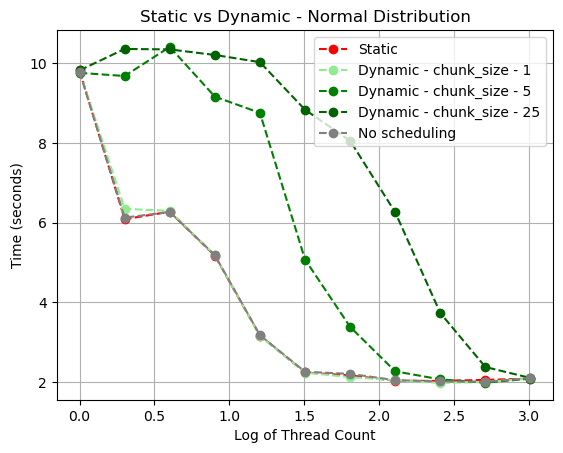

In [79]:
plt.plot(np.log10(normal_static.bucket_count), normal_static.time, label='Static', marker='o', color='red', linestyle='--')
plt.plot(np.log10(normal_dynamic.bucket_count), normal_dynamic.time, label='Dynamic - chunk_size - 1', marker='o', color=(0.56, 0.93, 0.56), linestyle='--')
plt.plot(np.log10(normal_dynamic_5.bucket_count), normal_dynamic_5.time, label='Dynamic - chunk_size - 5', marker='o', color='green', linestyle='--')
plt.plot(np.log10(normal_dynamic_25.bucket_count), normal_dynamic_25.time, label='Dynamic - chunk_size - 25', marker='o', color=(0.0, 0.39, 0.0), linestyle='--')
plt.plot(np.log10(normal_none.bucket_count), normal_none.time, label='No scheduling', marker='o', color='gray', linestyle='--')

plt.title('Static vs Dynamic - Normal Distribution')
plt.xlabel('Log of Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

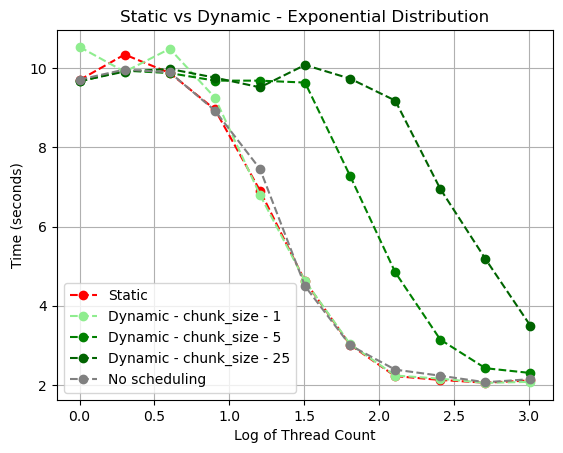

In [80]:
plt.plot(np.log10(exponential_static.bucket_count), exponential_static.time, label='Static', marker='o', color='red', linestyle='--')
plt.plot(np.log10(exponential_dynamic.bucket_count), exponential_dynamic.time, label='Dynamic - chunk_size - 1', marker='o', color=(0.56, 0.93, 0.56), linestyle='--')
plt.plot(np.log10(exponential_dynamic_5.bucket_count), exponential_dynamic_5.time, label='Dynamic - chunk_size - 5', marker='o', color='green', linestyle='--')
plt.plot(np.log10(exponential_dynamic_25.bucket_count), exponential_dynamic_25.time, label='Dynamic - chunk_size - 25', marker='o', color=(0.0, 0.39, 0.0), linestyle='--')
plt.plot(np.log10(exponential_none.bucket_count), exponential_none.time, label='No scheduling', marker='o', color='gray', linestyle='--')

plt.title('Static vs Dynamic - Exponential Distribution')
plt.xlabel('Log of Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()